In [ ]:
pip install matplotlib


Accuracy: 0.93


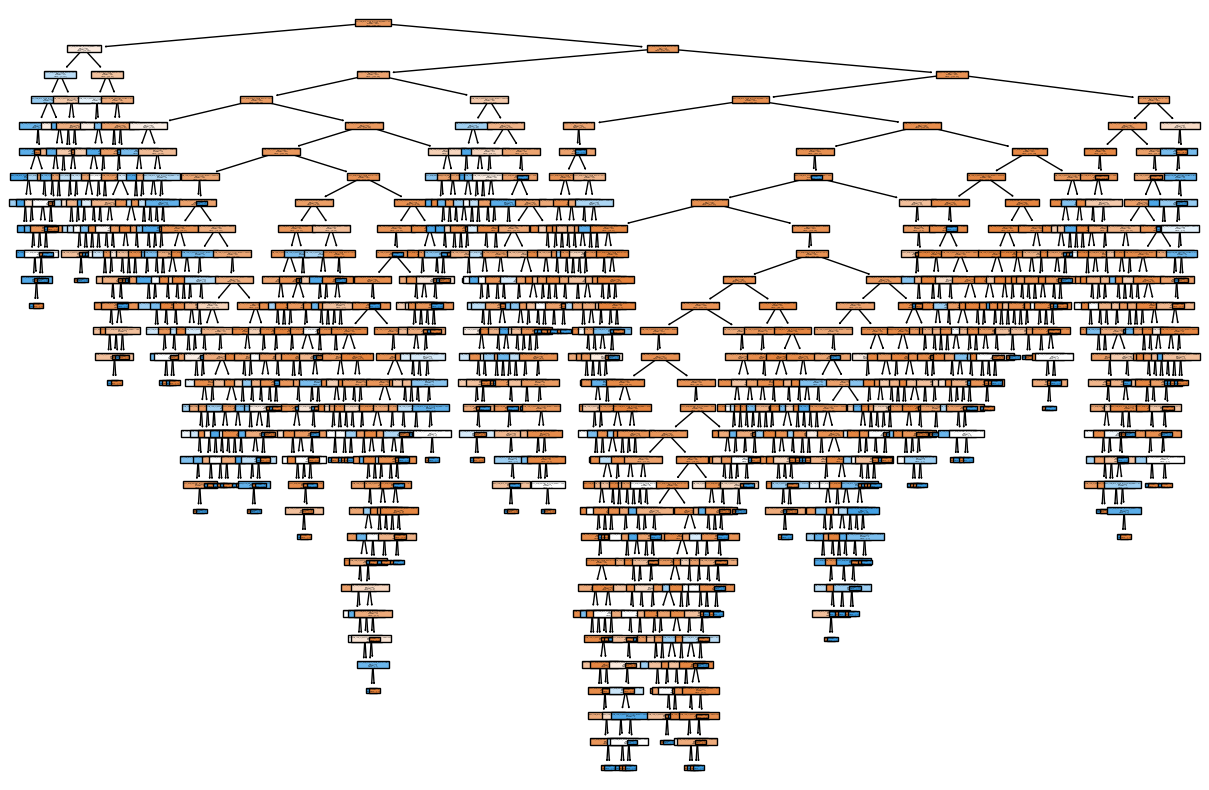

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('Social Media Data for DSBA.csv')

# Check for any missing values in the dataset
if dataset.isnull().sum().any():
    print("Warning: Missing values detected in the dataset. Imputing missing values.")
    # Handle missing values using imputation
    numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = dataset.select_dtypes(include=['object']).columns

    # Impute numeric columns with the mean
    numeric_imputer = SimpleImputer(strategy='mean')
    dataset[numeric_columns] = numeric_imputer.fit_transform(dataset[numeric_columns])

    # Impute categorical columns with the most frequent value
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    dataset[categorical_columns] = categorical_imputer.fit_transform(dataset[categorical_columns])

# Extract the features (X) and target variable (y)
X = dataset[['Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page',
             'Daily_Avg_mins_spend_on_traveling_page', 'week_since_last_outstation_checkin',
             'total_likes_on_outstation_checkin_given']]
y = dataset['Taken_product']

# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(15, 10))

try:
    # Attempt to use the class_names parameter (for scikit-learn >= 0.24)
    plot_tree(dt_classifier, feature_names=X.columns.tolist(), class_names=target_class_names, filled=True)
except TypeError:
    # If class_names parameter is not supported, use the plot_tree without class_names
    plot_tree(dt_classifier, feature_names=X.columns.tolist(), filled=True)

plt.show()
